<a href="https://colab.research.google.com/github/gveloso7/Exercicio-Womakerscode/blob/main/Probabilidade_amostragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files, drive
from collections import defaultdict

1. Considere pessoas fluentes em inglês, qual a probabilidade
complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa
aleatória e ela não ser fluente em inglês. Considere fluente quem tem o
nível avançado.


In [21]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/populacao_brasileira.csv"
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
df.head(10)

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M
5,5,AM,38,Fundamental,Avançado,4441.57,F
6,6,DF,56,Médio,Intermediário,528.36,F
7,7,DF,36,Superior,Avançado,2203.10,F
8,8,PI,40,Fundamental,Básico,3577.07,F
9,9,AP,28,Superior,Avançado,2796.95,M


In [42]:
total = len(df)

# Filtrando apenas as linhas onde a coluna "nível de proficiência em inglês"
fluentes = df[df["nível de proficiência em inglês"] == "Avançado"].shape[0]

# Probabilidade complementar (não fluentes)
nao_fluente = 1 - (fluentes / total)

print(f"Probabilidade de escolha de uma pessoa não fluente é de: {nao_fluente:.2%}")

Probabilidade de escolha de uma pessoa não fluente é de: 65.60%


2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual
é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [48]:

# Filtrar pessoas de Alagoas (AL) ou Pará (PA)
df_al_pa = df[df["estado"].isin(["AL", "PA"])]

# Contagem total de pessoas desses estados
total_al_pa = len(df_al_pa)

# Contagem de pessoas desses estados com renda superior a 5 mil reais
renda_superior_5k = df_al_pa[df_al_pa["renda"] > 5000].shape[0]

# Probabilidade de ter renda superior a 5 mil reais
prob_renda_superior_5k = renda_superior_5k / total_al_pa

print(f" A probabilidade de algém do AL ou PA ter renda superior a 5K é de: {prob_renda_superior_5k:.2%}")

 A probabilidade de algém do AL ou PA ter renda superior a 5K é de: 5.06%


3. Descubra a probabilidade de uma pessoa, residente no estado do
Amazonas, ter ensino superior completo (considerando apenas a
escolaridade classificada como 'Superior'). Qual a probabilidade da quinta
pessoa amazonense que você conversar ter ensino superior completo?

In [49]:

# Filtrar apenas pessoas do Amazonas (AM)
df_amazonas = df[df["estado"] == "AM"]

# Contagem total de pessoas do Amazonas
total_amazonas = len(df_amazonas)

# Contagem de pessoas do Amazonas com ensino superior
superior_amazonas = df_amazonas[df_amazonas["escolaridade"] == "Superior"].shape[0]

# Probabilidade de ter ensino superior
prob_superior_amazonas = superior_amazonas / total_amazonas

# Probabilidade da quinta pessoa amazonense ter ensino superior (distribuição geométrica)
prob_quinta_pessoa = (1 - prob_superior_amazonas) ** 4 * prob_superior_amazonas

prob_superior_amazonas, prob_quinta_pessoa

print(f" As probabilidades de um residente amazonense ter ensino superior completo e da quinta pessoa amazonense ter ensino superior completo são de: {prob_superior_amazonas:.2%} e {prob_quinta_pessoa:.2%} respectivamente")

 As probabilidades de um residente amazonense ter ensino superior completo e da quinta pessoa amazonense ter ensino superior completo são de: 23.68% e 8.03% respectivamente


4. Considerando a renda das pessoas do nosso conjunto, podemos dizer
que a renda de uma pessoa brasileira está na sua maioria em que faixa
(faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?
5. Calcule a média e a variância da renda da amostra. Depois faça a
distribuição normal, inclua o gráfico.


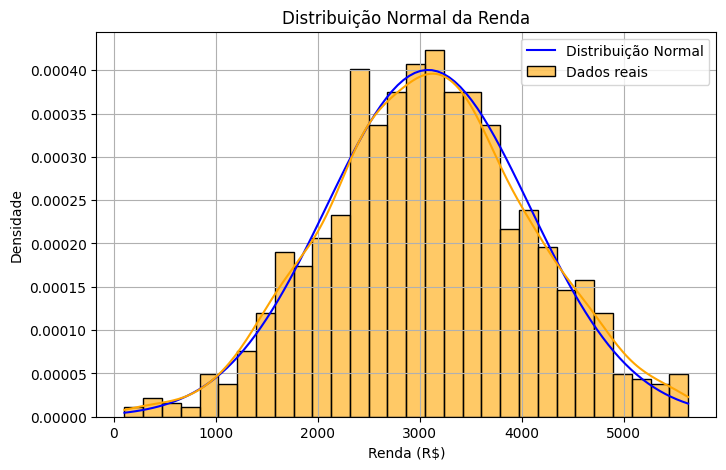


3082.5371800000003, 993156.228167617


In [52]:
# 5. Cálculo da média e variância da renda
media_renda = df["renda"].mean()
variancia_renda = df["renda"].var()
desvio_padrao_renda = np.sqrt(variancia_renda)

# Criar a distribuição normal com base na média e no desvio padrão
x = np.linspace(df["renda"].min(), df["renda"].max(), 100)
pdf = stats.norm.pdf(x, media_renda, desvio_padrao_renda)

# Plotar a distribuição normal e o histograma dos dados reais
plt.figure(figsize=(8,5))
plt.plot(x, pdf, label="Distribuição Normal", color="blue")
sns.histplot(df["renda"], kde=True, stat="density", bins=30, color="orange", alpha=0.6, label="Dados reais")
plt.xlabel("Renda (R$)")
plt.ylabel("Densidade")
plt.title("Distribuição Normal da Renda")
plt.legend()
plt.grid(True)
plt.show()


print(f"\n{media_renda}, {variancia_renda}")

6. Primeiro considere a probabilidade encontrada no nosso conjunto de
pessoas com escolaridade de pós-graduação. Considerando a amostra de
população brasileira com 1 milhão de habitantes, qual a probabilidade de
encontrarmos 243 mil pessoas com pós-graduação?

In [57]:
# Proporção de pessoas com pós-graduação na amostra
total_pessoas = len(df)
pos_graduacao = df[df["escolaridade"] == "Pós-graduação"].shape[0]
prob_pos_graduacao = pos_graduacao / total_pessoas

# Probabilidade de encontrar 243 mil pessoas em uma população de 1 milhão (distribuição binomial)
populacao_total = 1_000_000
pessoas_esperadas = 243_000

# Usar a distribuição binomial para calcular a probabilidade
prob_243k = stats.binom.pmf(pessoas_esperadas, populacao_total, prob_pos_graduacao)

prob_pos_graduacao, prob_243k


(0.253, np.float64(1.1104854289794913e-119))

7. Somando as densidades nós temos a função de densida de acumulada.
Considerando a coluna ‘Escolaridade’ faça a função de densidade
acumulada discreta para cada nível de escolaridade.

In [53]:

# Contagem de cada nível de escolaridade
escolaridade_counts = df["escolaridade"].value_counts(normalize=True).sort_index()

# Criar a função de densidade acumulada (CDF)
cdf_escolaridade = escolaridade_counts.cumsum()

# Exibir os valores calculados
cdf_escolaridade


,proportion
escolaridade,
Fundamental,0.266
Médio,0.504
Pós-graduação,0.757
Superior,1.000


8. Qual a margem de erro amostral da proporção populacional
considerando a proporção de pessoas com nível de inglês intermediário?

In [56]:
from math import sqrt

# Proporção de pessoas com inglês intermediário
intermediario = df[df["nível de proficiência em inglês"] == "Intermediário"].shape[0]
p_intermediario = intermediario / total_pessoas

# Nível de confiança de 95% (Z = 1.96)
z = 1.96

# Cálculo da margem de erro
margem_erro = z * sqrt((p_intermediario * (1 - p_intermediario)) / total_pessoas)

print(p_intermediario, margem_erro)


(0.329, 0.029121603225097343)

9. Calcula a renda da população. Qual a probabilidade de encontrar 60
pessoas com uma renda mil reais superior à média?


In [54]:

# Definir a renda alvo (média + 1000)
renda_alvo = media_renda + 1000

# Probabilidade de uma pessoa ter renda maior que o valor alvo (utilizando distribuição normal)
prob_renda_superior = 1 - stats.norm.cdf(renda_alvo, media_renda, desvio_padrao_renda)

# Probabilidade de encontrar exatamente 60 pessoas com essa renda (distribuição binomial)
prob_60_pessoas = stats.binom.pmf(60, total_pessoas, prob_renda_superior)

print(prob_renda_superior, prob_60_pessoas)


(np.float64(0.15782441468557828), np.float64(1.1597038406783114e-21))

10. Qual é a probabilidade de escolhermos uma pessoa residente na região
Sudeste que seja homem, tenha apenas ensino fundamental completo e
possua renda mensal superior a 2 mil reais?


In [55]:
# Definir os estados do Sudeste
estados_sudeste = ["SP", "RJ", "MG", "ES"]

# Filtrar o conjunto de dados conforme os critérios
filtro_sudeste = df[
    (df["estado"].isin(estados_sudeste)) &
    (df["sexo"] == "M") &
    (df["escolaridade"] == "Fundamental") &
    (df["renda"] > 2000)
]

# Calcular a probabilidade
prob_sudeste_homem_fundamental_renda = len(filtro_sudeste) / total_pessoas

print(prob_sudeste_homem_fundamental_renda)


0.019